## This is a EDA Analysis done on UI Benefits + Unemployment Rates in the U.S

## Samples were selected using statistical methods, such as normal approximation rule and randomized blocking design

## In this first portion of code we are simply importing necessary libraries, downloading files and cleaning our unemployment insurance datasets

In [1]:
from IPython.display import display
from fredapi import Fred
from scipy.stats import norm
import math
import scipy as sp
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#regresssion modeling
from sklearn import linear_model
import statsmodels.api as sm

#manually loading files

#samples for all states pre covid 06/18 - 01/20 ANTI UI
AZclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/AZclaimsPre.csv")
IDclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/IDclaimsPre.csv")
MDclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MDclaimsPre.csv")
MSclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MSclaimsPre.csv")
TNclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/TNclaimsPre.csv")
OHclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/OHclaimsPre.csv")
WVclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/WVclaimsPre.csv")
UTclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/UTclaimsPre.csv")

#samples for all states pre covid 06/18 - 01/20 PRO UI
CAclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/CAclaimsPre.csv")
NJclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/NJclaimsPre.csv")
ILclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/ILclaimsPre.csv")
NVclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/NVclaimsPre.csv")
NMclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/NMclaimsPre.csv")
MTclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MTclaimsPre.csv")
MAclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MAclaimsPre.csv")
TXclaimsPre = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/TXclaimsPre.csv")



#samples for states against UI 01/01/20 - 08/21
AZclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/AZclaims.csv")
IDclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/IDclaims.csv")
MDclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MDclaims.csv")
MSclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MSclaims.csv")
TNclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/TNclaims.csv")
OHclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/OHclaims.csv")
WVclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/WVclaims.csv")
UTclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/UTclaims.csv")


#samples for states pro UI 01/01/20 - 08/21
CAclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/CAclaims.csv")
NJclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/NJclaims.csv")
ILclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/ILclaims.csv")
NVclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/NVclaims.csv")
NMclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/NMclaims.csv")
MTclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MTclaims.csv")
MAclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/MAclaims.csv")
TXclaims = pd.read_csv("/Users/n/Downloads/Data Project UI/Updated UI Samples/TXclaims.csv")

In [2]:

#lists for cleaning process
dirtyFiles = [AZclaims, IDclaims, MDclaims, MSclaims,
              TNclaims, OHclaims, WVclaims, UTclaims,
              CAclaims, NJclaims, ILclaims, NVclaims,
              NMclaims, MTclaims, MAclaims,TXclaims]

dirtyFilesPre = [AZclaimsPre, IDclaimsPre, MDclaimsPre, MSclaimsPre,
                  TNclaimsPre, OHclaimsPre, WVclaimsPre, UTclaimsPre,
                  CAclaimsPre, NJclaimsPre, ILclaimsPre, NVclaimsPre,
                  NMclaimsPre, MTclaimsPre, MAclaimsPre,TXclaimsPre]

cleanFiles = []
cleanFilesPre = []

#list for UI Pre covid
UIfiles_pre_covid = []

#statistical values
costFiles = []
UIstatsFiles = []
averageUI = []


#lists for UR data + initializing API key
fred = Fred(api_key= 'f8b4fd767fbe89c443a5066caa20d70c')

UR_Data =   ['AZUR', 'IDUR', 'MDUR', 'MSUR',
            'TNUR', 'OHUR', 'WVUR', 'UTUR',
            'CAUR', 'NJUR', 'ILUR', 'NVUR',
            'NMUR', 'MTUR', 'MAUR', 'TXUR']

URfiles = []
URfiles_pre_COVID = []

#api key request UR data
#'2020-01-01'
#'2021-08-31'



def getURdata(states, startDate, endDate, endList):
    for i in UR_Data:
        api_request = fred.get_series(i, observation_start = startDate,  observation_end= endDate)
        transformData = pd.DataFrame(api_request, columns =['Unemployment Rate'])
        noIndex = transformData.reset_index()
        testfinal = noIndex.rename(columns = {"index": "Month/Year", "Unemployment Rate": "Unemployment Rate"})
        endList.append(testfinal)

def getUIdata(states, startDate, endDate, endList):
    pass


#cleans UI data by csv file and by batch
def cleanCSV(uncleanFile, location):
    #fixes our rows
    clean1 = uncleanFile.drop(
        index =[0],
        axis = 0,
        inplace=False
    )
    #second part of fixing rows
    clean2 = clean1.drop(
    index =[1],
    axis = 0,
    inplace = False
    )

    #fix the column headers
    changeColumn = clean2.rename(
    columns = {"STATE": "Date",
    "Initial": "Initial Claims",
    "First": "First Payments",
    "Weeks": "Weeks Claimed",
    "Weeks.1": "Weeks Compensated",
    "Avg. Wkly": "Avg. Wkly Benefit",
    "Benefits": "Benefits Paid",
    "Final": "Final Payments"
    }
    )

    #changes data type
    #changeColumn['Benefits Paid'] = changeColumn['Benefits Paid'].astype(float)
    changeColumn["Initial Claims"]=changeColumn["Initial Claims"].str.replace(',', '')
    changeColumn["First Payments"]=changeColumn["First Payments"].str.replace(',', '')
    changeColumn["Weeks Claimed"]=changeColumn["Weeks Claimed"].str.replace(',', '')
    changeColumn["Weeks Compensated"]=changeColumn["Weeks Compensated"].str.replace(',', '')
    changeColumn["Weeks Claimed"]=changeColumn["Benefits Paid"].str.replace(',', '')
    changeColumn["Benefits Paid"]=changeColumn["Benefits Paid"].str.replace(',', '')
    changeColumn["Final Payments"]=changeColumn["Final Payments"].str.replace(',', '')

    #changes data type
    changeColumn['Benefits Paid'] = changeColumn['Benefits Paid'].astype(float)

    location.append(changeColumn)
    
    #cleaning our UI data
def batchClean(dirtyData, location):
    for i in dirtyData:
        cleanCSV(i, location)


In [3]:
#cleaning our data post covid
batchClean(dirtyFiles, cleanFiles)

#clean post covid UER data
getURdata(UR_Data,'2020-01-01', '2021-08-01', URfiles)


#clean pre covid UER data
getURdata(UR_Data, '2018-06-01', '2020-01-01', URfiles_pre_COVID)

#cleaning our data pre covid
batchClean(dirtyFilesPre, cleanFilesPre)



## In this block of code we are filtering our dataset 

In [4]:
#filters data
def get_top_claims(file):
    columns = file[['Date', 'Benefits Paid', 'Initial Claims']]
    top_benefits = columns.sort_values(by=['Benefits Paid'], ascending = False)
    return top_benefits.head()
def filter_ur(file):
    columns = file[['Month/Year', 'Unemployment Rate']]
    filter = columns.sort_values(by=['Unemployment Rate'], ascending = False)
    return filter.head()

In [5]:
#Test code for arizona exploring our top benefits paid
get_top_claims(cleanFiles[0])

,Date,Benefits Paid,Initial Claims
7,6/30/20,258024297.0,110709
9,8/31/20,223939806.0,52303
8,7/31/20,189249834.0,91992
6,5/31/20,182753379.0,119809
10,9/30/20,161758100.0,39616


In [6]:
#Test code for arizona exploring our top levels of Unemployment
filter_ur(URfiles[0])

,Month/Year,Unemployment Rate
3,2020-04-01,14.2
5,2020-06-01,10.7
4,2020-05-01,10.6
6,2020-07-01,10.4
7,2020-08-01,7.0


## Statistical functions to calculate various descriptive statistics related to both unemployment rates and unemployment benefits

In [7]:
# descriptive stats for Unemployment Insurance
def stats_UI(file):
    columns = file['Benefits Paid']
    simplified = columns.round(5)
    stats = simplified.describe()
    print(stats)
    
# stats for Unemployment Rates    
def stats_UR(state, file):
    columns = file['Unemployment Rate']
    stats = columns.describe()
    print(f"\nThese are the stats for {state.title()} UR 'Value' in simplified notation.")
    print(stats)
#correlation between UR and UI benefits
def correlation(file1, file2):
    Correlation = file1['Benefits Paid'].corr(file2['Unemployment Rate'])
    print(Correlation)
    
def total_descriptive_stats(file):
    for i in cleanFiles:
        x = stats_UI(i)
        UIstatsFiles.append(x)
#z scores      
def z_score(file):
    x = scipy.stats.zscore(file)
    return x



## Calculates the total cost of the UI program

In [8]:
def program_cost(file):
    columns = file['Benefits Paid']
    print(columns.sum())
def total_cost_all(file):
    for i in cleanFiles:
        x = program_cost(i)
        costFiles.append(x)

## These functions calulate the average UI benefits 

In [8]:
# average UI per state
def average_UI_per_state(file):
    for i in cleanFiles:
        test = i['Benefits Paid']
        avg = test.mean()
        averageUI.append(avg)
        
#creating a dataframe for our UI data
def createavgUIframe(file):
    x = pd.DataFrame(file, columns=['Benefits Paid'])
    test.append(x)

## Combining Our UI data Into one table, we can conduct an analysis on 
## Also combining our UR data into one table

In [9]:
#these lists are for our UI data
allUI = []
UIarray = []
mergedDataframeUI = []

#these lists are for our UR data
allUR = []
URarray = []
URaggr = []


#converting our UI to one dataframe
def benefitsPerState(file, location):
    for i in file:
        columns = i['Benefits Paid']
        location.append(columns)
        
def valuesBenefitsPaid(file, location):
    for i in file:
        extract = np.array(i)
        location.append(extract)
        
def arrayTodataframe(file, location):
    x = pd.DataFrame.from_records(file)
    y = x.stack().tolist()
    z = pd.DataFrame(data=y, columns = ['Benefits Paid'])
    location.append(z)


#converting our UR to one dataframe
def unemploymentPerState(file, location):
    for i in file:
        columns = i['Unemployment Rate']
        location.append(columns)

def valuesUnemployment(file, location):
    for i in file:
        extract = np.array(i)
        location.append(extract)

def arrayList(file, location):
    x = pd.DataFrame.from_records(file)
    y = x.stack().tolist()
    z = pd.DataFrame(data=y, columns = ['Unemployment Rate'])
    location.append(z)

#post covid UI aggregate
benefitsPerState(cleanFiles, allUI)
valuesBenefitsPaid(allUI, UIarray)
arrayTodataframe(UIarray, mergedDataframeUI)
UI_values_aggregate = mergedDataframeUI[0]

x = pd.concat(URfiles[0:16])
UER = x[['Unemployment Rate', 'Month/Year']]

In [10]:
#post covid UER aggregate
unemploymentPerState(URfiles, allUR)
valuesUnemployment(allUR, URarray)
arrayList(URarray, URaggr)
UR_values_aggregate = URaggr[0]

## Probability distribution Table

In [11]:
def probabilityDist(file):

    #test code freuqency dsitribution
    test0 = file['Benefits Paid']
    test1 = test0.describe()
    test2 = test0.max() - test0.min()
    class_width = test2 / 5

    category0 = test0.min()
    category1 = category0 + class_width
    category2 = category1 + class_width +1
    category3 = category2 + class_width +1
    category4 = category3 + class_width +1
    category5 = category4 + class_width +1

    classList = [category0, category1, category2, category3, category4, category5]
    classCategories = pd.DataFrame(data=classList, columns=['Classes'])

    #Logic + DataFrame Probability
    extract = file['Benefits Paid']
    x = np.array(extract)

    def sortLogic(array):
        for int in array:
            if int <= category0:
                x = 0
                testlist.append(x)
            elif int <= category1:
                x = 1
                testlist.append(x)
            elif int <= category2:
                x = 2
                testlist.append(x)
            elif int <= category3:
                x = 3
                testlist.append(x)
            elif int <= category4:
                x = 4
                testlist.append(x)
            elif int <= category5:
                x = 5
                testlist.append(x)

    #sorting our data
    testlist = []
    sortLogic(x)

    #formatting our data
    sortedData = pd.DataFrame(data=testlist, columns=['Category'])
    process1 = sortedData.value_counts().reset_index()
    process2 = pd.DataFrame(data=process1, columns=[0])

    #concatenating tables
    freqTable = pd.concat([classCategories, process2], axis=1)
    probabilityFunction = freqTable[0] / 20
    probabilityTable = pd.concat([classCategories, probabilityFunction], axis=1)

    #this function takes the data frame for probability and converts it into a visualization
    def probability_plot(table):
        x_values = probabilityTable['Classes']
        y_values = probabilityTable[0]
        sns.set_theme()
        plt.grid()
        plt.scatter(x_values, y_values)
        plt.xlabel('Class Size', fontsize = 14)
        plt.ylabel('Probabilty', fontsize = 14)
        plt.title(f'Probabilty Distribution for UI')
        plt.grid()
        plt.show()

    display(probabilityTable)

## Visualization functions

In [13]:
def plotClaim(state, file):
    x_values = file["Date"]
    y_values = file["Benefits Paid"]
    plt.plot(x_values, y_values)
    plt.title(f"{state.title()} Benefits Paid 'in billions'\n 01/20 - 09/21 ")
    plt.xlabel("Dates")
    plt.ylabel("Number of Claims")
    #size of tick labels
    plt.tick_params(axis = 'x', which = 'major', labelsize=6)
    plt.grid()
    #show graph
    plt.show()

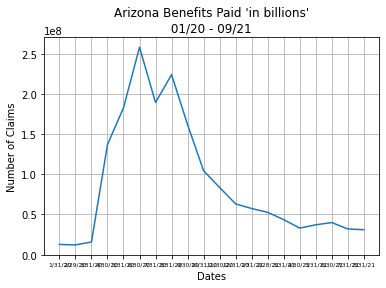

In [14]:
#test data
plotClaim('Arizona',cleanFiles[0])

In [15]:
#this function graphs a probability function for a given state
#it takes two arguments that being the state name and the file
def probabilityDistplot(state, file):

    #test code freuqency dsitribution
    test0 = file['Benefits Paid']
    test1 = test0.describe()
    test2 = test0.max() - test0.min()
    class_width = test2 / 5

    category0 = test0.min()
    category1 = category0 + class_width
    category2 = category1 + class_width +1
    category3 = category2 + class_width +1
    category4 = category3 + class_width +1
    category5 = category4 + class_width +1

    classList = [category0, category1, category2, category3, category4, category5]
    classCategories = pd.DataFrame(data=classList, columns=['Classes'])

    #Logic + DataFrame Probability
    extract = file['Benefits Paid']
    x = np.array(extract)

    def sortLogic(array):
        for int in array:
            if int <= category0:
                x = 0
                testlist.append(x)
            elif int <= category1:
                x = 1
                testlist.append(x)
            elif int <= category2:
                x = 2
                testlist.append(x)
            elif int <= category3:
                x = 3
                testlist.append(x)
            elif int <= category4:
                x = 4
                testlist.append(x)
            elif int <= category5:
                x = 5
                testlist.append(x)

    #sorting our data
    testlist = []
    sortLogic(x)

    #formatting our data
    sortedData = pd.DataFrame(data=testlist, columns=['Category'])
    process1 = sortedData.value_counts().reset_index()
    process2 = pd.DataFrame(data=process1, columns=[0])

    #concatenating tables
    freqTable = pd.concat([classCategories, process2], axis=1)
    probabilityFunction = freqTable[0] / 20
    probabilityTable = pd.concat([classCategories, probabilityFunction], axis=1)

    #this function takes the data frame for probability and converts it into a visualization
    def probability_plot(table):
        x_values = probabilityTable['Classes']
        y_values = probabilityTable[0]
        sns.set_theme()
        plt.grid()
        plt.scatter(x_values, y_values)
        plt.xlabel('Class Size', fontsize = 14)
        plt.ylabel('Probabilty', fontsize = 14)
        plt.title(f'Probabilty Distribution for {state.title()} UI Benefits "01/2020 - 09/2021"')
        plt.grid()
        plt.show()

    probability_plot(probabilityTable)

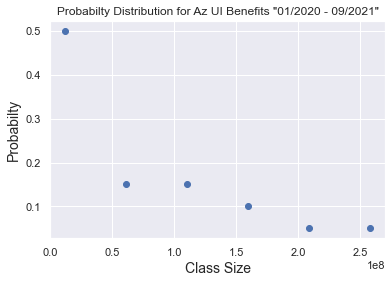

In [16]:
probabilityDistplot('AZ', cleanFiles[0])

In [17]:
#correlation dist
def correlation_dist(state, UIfile, URfile, timeframe, X_var_name):
    x_values = UIfile
    y_values = URfile[['Unemployment Rate']]
    sns.set_theme()
    plt.xlabel(f'{X_var_name}', fontsize = 16)
    plt.ylabel('Unemployment Rate', fontsize = 16)
    plt.title(f"Correlation Plot of Unemployment Rates and {X_var_name} \n In {state.title()} {timeframe}", fontsize = 16)
    plt.scatter(x_values, y_values)
    plt.show()

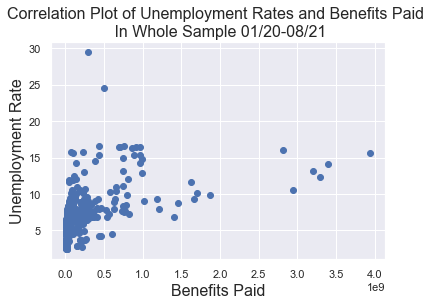

In [20]:
correlation_dist('Whole Sample', UI_values_aggregate, UR_values_aggregate, "01/20-08/21", "Benefits Paid")

In [21]:
correlation(UI_values_aggregate, UR_values_aggregate)

0.473459924926593


# Hypothesis test for statistical significance between the correlation of UI and UER Post Covid 2020-2021

In [23]:
#hypothesis test for correlation values

def test_statistic(corrValue, sampleSize):
    degreesOffreedom = sampleSize - 2
    num = 1 - (corrValue)**2
    denom = degreesOffreedom
    testStatistic = corrValue / math.sqrt(num / denom)
    return testStatistic

def p_value(i, DF):
    x = scipy.stats.t.sf(abs(i), df=DF)*2
    return x
    
def reject_or_not_p(p, a):
    if p <= a:
        print(f"Becuase {a} (alpha) is greater than {p} (p-value), we will reject the null hypothesis")
    elif a < p:
        print(f"Becuase {p} is greater than {a}, we cannot reject the null hypothesis")

test_stat = round(test_statistic(0.45, 319),2)
p_val = p_value(8.97, 317)
critical_val_lower = round(sp.stats.t.ppf(.05/2, 317),2)
critical_val_upper = round(sp.stats.t.ppf(1-.05/2, 317),2)

print(f"The test statistic is {test_stat}")
print(f"The p value is {p_val}")
print("\n")
display(reject_or_not_p(p_val, .05))

The test statistic is 8.97
The p value is 2.6451057228468777e-17


Becuase 0.05 (alpha) is greater than 2.6451057228468777e-17 (p-value), we will reject the null hypothesis


None

# ANOVA Tests for Unemployment Rates Pre and Post COVID Between Sample Groups work in progress

In [24]:
testPre = []
testPost = []

#Getting Pre covid data, for ANOVA test
getURdata(UR_Data, '2017-06-01', '2019-01-01', testPre)
getURdata(UR_Data, '2020-01-01', '2021-08-01', testPost)


In [25]:
#Grouping our data sets into blocks, one pro coivd the other anti coivd
UERpostAnti = pd.concat(testPost[0:8])
UERpostPro = pd.concat(testPost[8:16])

UERpreAnti = pd.concat(testPre[0:8])
UERprePro = pd.concat(testPre[8:16])

In [26]:
#adding classification column into our frames 
UERpostAnti['Classification']= 'Pro'
UERpostPro['Classification']= 'Anti'


In [27]:
UERpostAnti = UERpostAnti.drop('Month/Year', axis=1)
UERpostPro = UERpostPro.drop('Month/Year', axis=1)
frames = [UERpostAnti,UERpostPro]

In [28]:
FinalFrame = pd.concat(frames)


In [29]:
#states that are against UI, unemployment rate data summarized
UERpostAnti['Unemployment Rate'].describe()

count    160.00000
mean       6.30000
std        2.77747
min        2.40000
25%        4.77500
50%        6.00000
75%        7.00000
max       16.40000
Name: Unemployment Rate, dtype: float64

In [30]:
#states pro UI, unemplyomet rate data summarized
UERpostPro['Unemployment Rate'].describe()

count    160.000000
mean       8.274375
std        4.003446
min        2.700000
25%        5.875000
50%        7.700000
75%        9.300000
max       29.500000
Name: Unemployment Rate, dtype: float64

## We are testing if there is statistically significant difference between Unemployment Rates for states who supported UI insurance and between states who were agianst UI insurance both post and pre covid
#Null: There is no difference between the sample means both pre and post covid
#Alternate: There is a difference between at least two of the sample means, pre and post covid

In [31]:
scipy.stats.f_oneway(UERpreAnti['Unemployment Rate'],UERprePro['Unemployment Rate'], UERpostAnti['Unemployment Rate'], UERpostPro['Unemployment Rate'])

F_onewayResult(statistic=98.4449652082046, pvalue=2.398488164264668e-52)

In [32]:
reject_or_not_p(2.398488164264668e-52, .05)

Becuase 0.05 (alpha) is greater than 2.398488164264668e-52 (p-value), we will reject the null hypothesis


# This test is only focused on UER post COVID and differs from the one above.

In [33]:
scipy.stats.f_oneway(UERpostAnti['Unemployment Rate'], UERpostPro['Unemployment Rate'])

F_onewayResult(statistic=26.270205572604734, pvalue=5.162867374710743e-07)

In [34]:
reject_or_not_p(5.162867374710743e-07, .05)

Becuase 0.05 (alpha) is greater than 5.162867374710743e-07 (p-value), we will reject the null hypothesis


In [37]:
#Aggregate Post covid UI + UER values ONLY ANTI UI
ANTI_all_UI = []
ANTI_UI_array = []
ANTImergedDataframeUI = []

#ANTI UI
benefitsPerState(cleanFiles[0:8], ANTI_all_UI)
valuesBenefitsPaid(ANTI_all_UI, ANTI_UI_array)
arrayTodataframe(ANTI_UI_array, ANTImergedDataframeUI)
UI_values_aggregate_ANTI = ANTImergedDataframeUI[0]


#ANTI UER
ANTI_all_UER = []
ANTI_UER_array = []
ANTImergedDataframeUER = []

unemploymentPerState(URfiles[0:8], ANTI_all_UER)
valuesUnemployment(ANTI_all_UER, ANTI_UER_array)
arrayList(ANTI_UER_array, ANTImergedDataframeUER)
UR_values_aggregate_ANTI = ANTImergedDataframeUER[0]
display(UR_values_aggregate_ANTI)

,Unemployment Rate
0,4.8
1,4.9
2,5.0
3,14.2
4,10.6
...,...
155,2.8
156,2.7
157,2.7
158,2.6


In [38]:
#Aggregate Post covid UI + UER values ONLY ANTI UI

#pro UI values
PRO_all_UI = []
PRO_UI_array = []
PROmergedDataframeUI = []

benefitsPerState(cleanFiles[8:16], PRO_all_UI)
valuesBenefitsPaid(PRO_all_UI, PRO_UI_array)
arrayTodataframe(PRO_UI_array, PROmergedDataframeUI)
UI_values_aggregate_PRO = PROmergedDataframeUI[0]

#PRO UER values 
PRO_all_UER = []
PRO_UER_array = []
PROmergedDataframeUER = []

unemploymentPerState(URfiles[8:16], PRO_all_UER)
valuesUnemployment(PRO_all_UER, PRO_UER_array)
arrayList(PRO_UER_array, PROmergedDataframeUER)
UR_values_aggregate_PRO = PROmergedDataframeUER[0]

In [40]:
#cleaning our data set for a new multiple regression model 


claims_benefits_paid_pro = []
claims_benefits_paid_anti = []

def get_claims_benefits_paid(file, endFile):
    for i in file:
        columns = i[['Benefits Paid', 'Initial Claims']]
        endFile.append(columns)


get_claims_benefits_paid(cleanFiles[0:8], claims_benefits_paid_anti)
get_claims_benefits_paid(cleanFiles[8:16],claims_benefits_paid_pro)


df_anti_claims_benefits = pd.concat(claims_benefits_paid_anti).astype(int)
df_pro_claims_benefits = pd.concat(claims_benefits_paid_pro).astype(int)

df_anti_claims_benefits = df_anti_claims_benefits.reset_index()
df_pro_claims_benefits = df_pro_claims_benefits.reset_index()

aggr_multiple_reggression = pd.concat([df_anti_claims_benefits, df_pro_claims_benefits])


aggr_multiple_reggression.reset_index(drop=True, inplace=True)
UER.reset_index(drop=True, inplace=True)


#mutliple regression model for inital claims and benefits paid anti 
X = z_score(aggr_multiple_reggression[['Benefits Paid', 'Initial Claims']])
Y = z_score(UER[['Unemployment Rate']])
X = sm.add_constant(X)


model = sm.OLS(Y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     46.00
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.88e-18
Time:                        11:21:31   Log-Likelihood:                -413.29
No. Observations:                 320   AIC:                             832.6
Df Residuals:                     317   BIC:                             843.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.469e-17      0.049  -7.02e

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Initial Claims', ylabel='Unemployment Rate'>

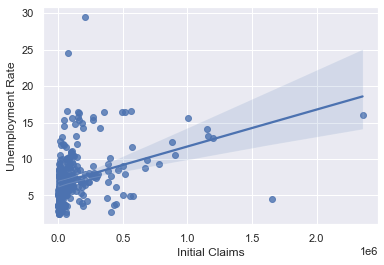

In [41]:
sns.regplot(aggr_multiple_reggression[['Initial Claims']],UER[['Unemployment Rate']])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Benefits Paid', ylabel='Unemployment Rate'>

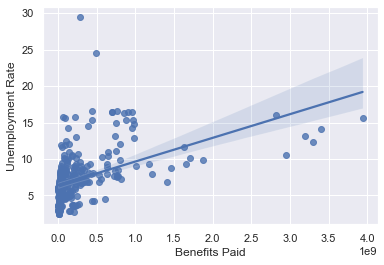

In [42]:
sns.regplot(aggr_multiple_reggression[['Benefits Paid']],UER[['Unemployment Rate']])